In [318]:
# Importing Libraries
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

## Project Complexity

In [319]:
# Reading the denormalized data
issue_prj_data = pd.read_csv('issue_project_event_filtered.csv')
issue_prj_data

,event_id,issue_id,issue_system_id,issue_type,new_value,old_value,priority,project_id,status
0,58c8db6d1cf3f06cf15912c5,58c8db6d1cf3f06cf15912c5,58c8d8bb1cf3f06cf158fbd8,Bug,NaN,3600,Major,58c8979e0da3ef6363ccb8de,timeestimate
1,58c8db741cf3f06cf15912fa,58c8db741cf3f06cf15912fa,58c8d8bb1cf3f06cf158fbd8,Question,NaN,259200,Major,58c8979e0da3ef6363ccb8de,timeestimate
2,58c8db751cf3f06cf1591303,58c8db751cf3f06cf1591303,58c8d8bb1cf3f06cf158fbd8,Bug,NaN,1800,Major,58c8979e0da3ef6363ccb8de,timeestimate
3,58c8db891cf3f06cf15913fb,58c8db891cf3f06cf15913fb,58c8d8bb1cf3f06cf158fbd8,Improvement,NaN,300,Minor,58c8979e0da3ef6363ccb8de,timeestimate
4,58c8db9d1cf3f06cf15914f9,58c8db9d1cf3f06cf15914f9,58c8d8bb1cf3f06cf158fbd8,Improvement,NaN,7200,Major,58c8979e0da3ef6363ccb8de,timeestimate
...,...,...,...,...,...,...,...,...,...
5289,5bc85c6acfe383462e46d0ee,5bc85c6acfe383462e46d0ee,5bc85085cfe383462e469802,Bug,86400,NaN,Critical,5bc0509e0da3ef0ddd6d593e,timeestimate
5290,5bc85ca6cfe383462e46d202,5bc85ca6cfe383462e46d202,5bc85085cfe383462e469802,Test,1209600,4838400,Major,5bc0509e0da3ef0ddd6d593e,timeestimate
5291,5bc86146cfe383462e46e890,5bc86146cfe383462e46e890,5bc85085cfe383462e469802,Bug,NaN,3600,Trivial,5bc0509e0da3ef0ddd6d593e,timeestimate
5292,5bc996c8861adc69151d322e,5bc996c8861adc69151d322e,5bc9964a861adc69151d2e24,Task,0,NaN,Minor,5bc0509e0da3ef0ddd6d593e,timeestimate


In [320]:
# Filtering only the data whose status is set as 'timeestimate'
issue_prj_data_tmeest = issue_prj_data[issue_prj_data['status']=='timeestimate'].copy()

In [321]:
# Displays the unique values of issue type
issue_prj_data_tmeest['issue_type'].unique()

array(['Bug', 'Question', 'Improvement', 'New Feature', 'Task',
       'Sub-task', 'Test', 'Wish', 'Epic', 'Story', 'Brainstorming',
       'Documentation', 'Dependency upgrade', 'Technical task'],
      dtype=object)

In [322]:
# Remapped the issue type column to categorical values assigned basis Jira hierarchy
issue_prj_data_tmeest['issue_type_val'] = issue_prj_data_tmeest['issue_type'].map({
    'Bug':1,
    'Epic':1,
    'Improvement':1,
    'New Feature':1,
    'Story':1,
    'Task':1,
    'Sub-task':1,
    'Technical task':1,
    'Question':2,
    'Test':3,
    'Wish':4,
    'Brainstorming':5,
    'Documentation':6,
    'Dependency upgrade':7,
    })

In [323]:
#Remapping the priority value to categorical values
issue_prj_data_tmeest['priority_val'] = issue_prj_data_tmeest['priority'].map({'Blocker':1,'Critical':1,'Major':2,'Trivial':3,'Minor':3})

In [324]:
issue_prj_data_tmeest

,event_id,issue_id,issue_system_id,issue_type,new_value,old_value,priority,project_id,status,issue_type_val,priority_val
0,58c8db6d1cf3f06cf15912c5,58c8db6d1cf3f06cf15912c5,58c8d8bb1cf3f06cf158fbd8,Bug,NaN,3600,Major,58c8979e0da3ef6363ccb8de,timeestimate,1,2
1,58c8db741cf3f06cf15912fa,58c8db741cf3f06cf15912fa,58c8d8bb1cf3f06cf158fbd8,Question,NaN,259200,Major,58c8979e0da3ef6363ccb8de,timeestimate,2,2
2,58c8db751cf3f06cf1591303,58c8db751cf3f06cf1591303,58c8d8bb1cf3f06cf158fbd8,Bug,NaN,1800,Major,58c8979e0da3ef6363ccb8de,timeestimate,1,2
3,58c8db891cf3f06cf15913fb,58c8db891cf3f06cf15913fb,58c8d8bb1cf3f06cf158fbd8,Improvement,NaN,300,Minor,58c8979e0da3ef6363ccb8de,timeestimate,1,3
4,58c8db9d1cf3f06cf15914f9,58c8db9d1cf3f06cf15914f9,58c8d8bb1cf3f06cf158fbd8,Improvement,NaN,7200,Major,58c8979e0da3ef6363ccb8de,timeestimate,1,2
...,...,...,...,...,...,...,...,...,...,...,...
5289,5bc85c6acfe383462e46d0ee,5bc85c6acfe383462e46d0ee,5bc85085cfe383462e469802,Bug,86400,NaN,Critical,5bc0509e0da3ef0ddd6d593e,timeestimate,1,1
5290,5bc85ca6cfe383462e46d202,5bc85ca6cfe383462e46d202,5bc85085cfe383462e469802,Test,1209600,4838400,Major,5bc0509e0da3ef0ddd6d593e,timeestimate,3,2
5291,5bc86146cfe383462e46e890,5bc86146cfe383462e46e890,5bc85085cfe383462e469802,Bug,NaN,3600,Trivial,5bc0509e0da3ef0ddd6d593e,timeestimate,1,3
5292,5bc996c8861adc69151d322e,5bc996c8861adc69151d322e,5bc9964a861adc69151d2e24,Task,0,NaN,Minor,5bc0509e0da3ef0ddd6d593e,timeestimate,1,3


In [325]:
# Compared both the old value and new value and derived a new column which has either the old value or new value
issue_prj_data_tmeest['derived_value'] = (issue_prj_data_tmeest['new_value'].combine_first(issue_prj_data_tmeest['old_value']))

In [326]:
#Applied regex to replace text minutes with spaces
issue_prj_data_tmeest['derived_value'].replace(' minutes','',regex=True,inplace= True)

In [327]:
# Converted the derived value to float
issue_prj_data_tmeest['derived_value_conv'] = issue_prj_data_tmeest['derived_value'].astype(float)

In [328]:
# Converted the derived value to hours as the existing data is in minutes
issue_prj_data_tmeest['derived_value_conv_hrs'] = issue_prj_data_tmeest['derived_value_conv']/60
issue_prj_data_tmeest

,event_id,issue_id,issue_system_id,issue_type,new_value,old_value,priority,project_id,status,issue_type_val,priority_val,derived_value,derived_value_conv,derived_value_conv_hrs
0,58c8db6d1cf3f06cf15912c5,58c8db6d1cf3f06cf15912c5,58c8d8bb1cf3f06cf158fbd8,Bug,NaN,3600,Major,58c8979e0da3ef6363ccb8de,timeestimate,1,2,3600,3600.0,60.0
1,58c8db741cf3f06cf15912fa,58c8db741cf3f06cf15912fa,58c8d8bb1cf3f06cf158fbd8,Question,NaN,259200,Major,58c8979e0da3ef6363ccb8de,timeestimate,2,2,259200,259200.0,4320.0
2,58c8db751cf3f06cf1591303,58c8db751cf3f06cf1591303,58c8d8bb1cf3f06cf158fbd8,Bug,NaN,1800,Major,58c8979e0da3ef6363ccb8de,timeestimate,1,2,1800,1800.0,30.0
3,58c8db891cf3f06cf15913fb,58c8db891cf3f06cf15913fb,58c8d8bb1cf3f06cf158fbd8,Improvement,NaN,300,Minor,58c8979e0da3ef6363ccb8de,timeestimate,1,3,300,300.0,5.0
4,58c8db9d1cf3f06cf15914f9,58c8db9d1cf3f06cf15914f9,58c8d8bb1cf3f06cf158fbd8,Improvement,NaN,7200,Major,58c8979e0da3ef6363ccb8de,timeestimate,1,2,7200,7200.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,5bc85c6acfe383462e46d0ee,5bc85c6acfe383462e46d0ee,5bc85085cfe383462e469802,Bug,86400,NaN,Critical,5bc0509e0da3ef0ddd6d593e,timeestimate,1,1,86400,86400.0,1440.0
5290,5bc85ca6cfe383462e46d202,5bc85ca6cfe383462e46d202,5bc85085cfe383462e469802,Test,1209600,4838400,Major,5bc0509e0da3ef0ddd6d593e,timeestimate,3,2,1209600,1209600.0,20160.0
5291,5bc86146cfe383462e46e890,5bc86146cfe383462e46e890,5bc85085cfe383462e469802,Bug,NaN,3600,Trivial,5bc0509e0da3ef0ddd6d593e,timeestimate,1,3,3600,3600.0,60.0
5292,5bc996c8861adc69151d322e,5bc996c8861adc69151d322e,5bc9964a861adc69151d2e24,Task,0,NaN,Minor,5bc0509e0da3ef0ddd6d593e,timeestimate,1,3,0,0.0,0.0


In [329]:
# Dropping columns which are not required for the model
issue_prj_data_tmeest.drop(['new_value', 'old_value', 'derived_value', 'derived_value_conv', 'event_id', 'issue_type', 'priority'], axis=1, inplace = True)

In [330]:
issue_prj_data_tmeest

,issue_id,issue_system_id,project_id,status,issue_type_val,priority_val,derived_value_conv_hrs
0,58c8db6d1cf3f06cf15912c5,58c8d8bb1cf3f06cf158fbd8,58c8979e0da3ef6363ccb8de,timeestimate,1,2,60.0
1,58c8db741cf3f06cf15912fa,58c8d8bb1cf3f06cf158fbd8,58c8979e0da3ef6363ccb8de,timeestimate,2,2,4320.0
2,58c8db751cf3f06cf1591303,58c8d8bb1cf3f06cf158fbd8,58c8979e0da3ef6363ccb8de,timeestimate,1,2,30.0
3,58c8db891cf3f06cf15913fb,58c8d8bb1cf3f06cf158fbd8,58c8979e0da3ef6363ccb8de,timeestimate,1,3,5.0
4,58c8db9d1cf3f06cf15914f9,58c8d8bb1cf3f06cf158fbd8,58c8979e0da3ef6363ccb8de,timeestimate,1,2,120.0
...,...,...,...,...,...,...,...
5289,5bc85c6acfe383462e46d0ee,5bc85085cfe383462e469802,5bc0509e0da3ef0ddd6d593e,timeestimate,1,1,1440.0
5290,5bc85ca6cfe383462e46d202,5bc85085cfe383462e469802,5bc0509e0da3ef0ddd6d593e,timeestimate,3,2,20160.0
5291,5bc86146cfe383462e46e890,5bc85085cfe383462e469802,5bc0509e0da3ef0ddd6d593e,timeestimate,1,3,60.0
5292,5bc996c8861adc69151d322e,5bc9964a861adc69151d2e24,5bc0509e0da3ef0ddd6d593e,timeestimate,1,3,0.0


In [331]:
# Creating a dataframe of only the independent variables
issue_clus_x = issue_prj_data_tmeest[['priority_val', 'issue_type_val', 'derived_value_conv_hrs']].copy()

In [332]:
issue_clus_x.head(10)

,priority_val,issue_type_val,derived_value_conv_hrs
0,2,1,60.0
1,2,2,4320.0
2,2,1,30.0
3,3,1,5.0
4,2,1,120.0
5,2,1,30.0
6,2,1,0.0
7,3,1,5.0
8,3,1,120.0
9,3,1,2880.0


In [333]:
# Applying MinMax scalar to all the features that are part of clustering
mms = MinMaxScaler()
mms.fit(issue_clus_x)
data_transformed = mms.transform(issue_clus_x)

In [334]:
data_transformed

array([[5.00000000e-01, 0.00000000e+00, 2.97619048e-04],
       [5.00000000e-01, 1.66666667e-01, 2.14285714e-02],
       [5.00000000e-01, 0.00000000e+00, 1.48809524e-04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.97619048e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00]])

In [335]:
# Fitting kmeans over transformed data for different clustering and calculating the sum of squared distances
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

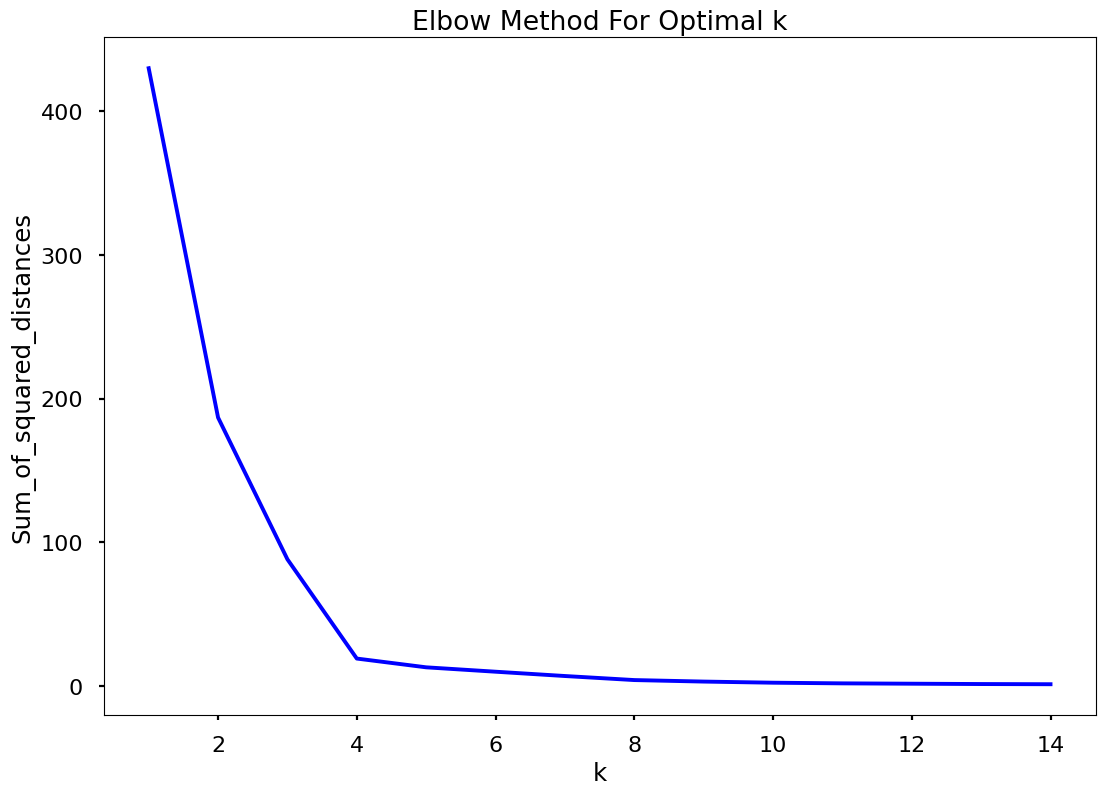

In [336]:
# Plotting the elbow curve to find the optimal number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [337]:
#Fitting and predicting the predicted labels using the optimal number of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(data_transformed).predict(data_transformed)
labels

array([0, 0, 0, ..., 1, 1, 0])

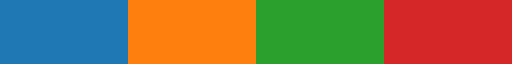

In [338]:
# Creating a color map
data_df = pd.DataFrame(data_transformed)
issue_label_map = {0:0, 1:1, 2:2, 3:3}
cmap = ListedColormap(get_cmap("tab10").colors[:4])
cmap

Text(0.5, 0, 'Issue Hours')

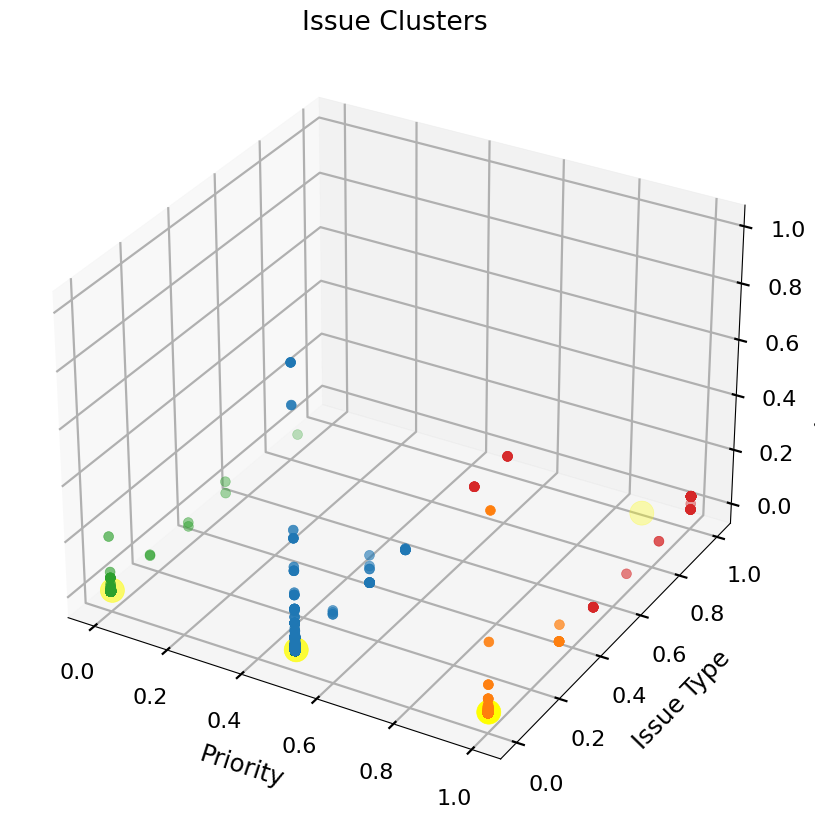

In [339]:
# Plotting a multi-dimensional graph to look at how the clusters are created
plt.style.use('seaborn-poster')
%matplotlib inline
x = data_df[0]
y = data_df[1]
z = data_df[2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c=pd.Series(labels).map(issue_label_map), cmap=cmap, s = 50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
ax.set_title('Issue Clusters')

# Set axes label
ax.set_xlabel('Priority', labelpad=20)
ax.set_ylabel('Issue Type', labelpad=20)
ax.set_zlabel('Issue Hours', labelpad=20)

In [340]:
data_df['labels'] = labels

In [341]:
data_df['project_id'] = issue_prj_data_tmeest[['project_id']].astype(str).copy()

In [342]:
data_df['iss_count'] = 1

In [343]:
data_df

,0,1,2,labels,project_id,iss_count
0,0.5,0.000000,0.000298,0,58c8979e0da3ef6363ccb8de,1
1,0.5,0.166667,0.021429,0,58c8979e0da3ef6363ccb8de,1
2,0.5,0.000000,0.000149,0,58c8979e0da3ef6363ccb8de,1
3,1.0,0.000000,0.000025,1,58c8979e0da3ef6363ccb8de,1
4,0.5,0.000000,0.000595,0,58c8979e0da3ef6363ccb8de,1
...,...,...,...,...,...,...
4322,0.0,0.000000,0.007143,2,6110d80c27ad48a9ceb48659,1
4323,0.5,0.333333,0.100000,0,6110d80c27ad48a9ceb48659,1
4324,1.0,0.000000,0.000298,1,6110d8254064fcb5083898b9,1
4325,1.0,0.000000,0.000000,1,6110d8254064fcb5083898b9,1


In [344]:
# grouping by project id, labels and filtering all the projects whose label count is the highest
df_agg = data_df.groupby(['project_id','labels']).agg({'iss_count':sum})
g = df_agg['iss_count'].groupby('project_id', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))
res

project_id                labels
58bfd5860da3ef7cef464c78  1          6
58c8979e0da3ef6363ccb8de  0         16
5b0fa95e0da3ef431af80833  0         14
5b110ee90da3ef05a99f0de6  0          3
5b1f9fbb0da3ef49b7d0a480  1          4
                                    ..
610939f8a6eb327cba047eca  0         19
61093a618d56179891397c7b  0         34
61093ee18d56179891397c7c  0         10
6110d80c27ad48a9ceb48659  0          2
6110d8254064fcb5083898b9  1          2
Name: iss_count, Length: 75, dtype: int64

In [345]:
# crating a scatter plot with project id and labels to look at the project complexity
c1 = alt.Chart(res.reset_index()[['project_id', 'labels']]).mark_point(filled=True, stroke='black',strokeWidth=1).encode(
    x='labels',
    y='project_id',
    color='labels:N',
)

In [346]:
c1

alt.Chart(...)

## Project Success Ratio

In [347]:
# Reading the denormalized data
vcs_prj_data = pd.read_csv('vcs_project_table.csv')
vcs_prj_data

,commit_id,duration,event_type,finished_at,number,pr_number,project_id,repository_type,started_at,state,tr_id,vcs_system_id
0,5bef253483ad2f56d21cadf4,103.0,push,2016-08-11T15:08:11.000Z,251,NaN,5beebd870da3ef21a62b756e,git,2016-08-11T15:06:28.000Z,passed,151534313,5bef24dc35e3ea2b7bc08208
1,5bef253483ad2f56e41caf06,69.0,push,2016-09-05T15:53:53.000Z,252,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T15:52:44.000Z,failed,157667999,5bef24dc35e3ea2b7bc08208
2,NaN,22.0,pull_request,2016-09-05T16:12:17.000Z,253,19.0,5beebd870da3ef21a62b756e,git,2016-09-05T16:11:55.000Z,errored,157669793,5bef24dc35e3ea2b7bc08208
3,5bef253483ad2f56e01cad80,103.0,push,2016-09-05T16:14:07.000Z,254,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T16:12:24.000Z,passed,157669807,5bef24dc35e3ea2b7bc08208
4,5bef253483ad2f56e01cad80,89.0,push,2016-09-05T16:23:54.000Z,255,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T16:22:25.000Z,passed,157672378,5bef24dc35e3ea2b7bc08208
...,...,...,...,...,...,...,...,...,...,...,...,...
89155,615e910a6511689f63ebb9eb,829.0,push,2020-11-19T20:45:04.000Z,1052,NaN,615e90db3044794dcc96fe1e,git,2020-11-19T20:39:24.000Z,passed,744743554,615e9105f73e2aa390c8a69b
89156,615e91096511689f63ebb9cd,849.0,push,2020-11-20T16:26:01.000Z,1053,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:20.000Z,passed,744924657,615e9105f73e2aa390c8a69b
89157,615e91096511689f63ebb9cd,805.0,push,2020-11-20T16:26:21.000Z,1054,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:28.000Z,passed,744924676,615e9105f73e2aa390c8a69b
89158,615e91096511689f63ebb9b1,816.0,push,2020-11-20T16:26:21.000Z,1055,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:38.000Z,passed,744924727,615e9105f73e2aa390c8a69b


In [348]:
vcs_prj_data.isna().sum()

commit_id          64348
duration               3
event_type             0
finished_at           10
number                 0
pr_number          45774
project_id             0
repository_type        0
started_at          4674
state                  0
tr_id                  0
vcs_system_id          0
dtype: int64

In [349]:
#Dropping all the commit id whose value is set as 'null'
indexAge = vcs_prj_data[vcs_prj_data['commit_id'].isna()].index
vcs_prj_data.drop(indexAge , inplace=True)
vcs_prj_data

,commit_id,duration,event_type,finished_at,number,pr_number,project_id,repository_type,started_at,state,tr_id,vcs_system_id
0,5bef253483ad2f56d21cadf4,103.0,push,2016-08-11T15:08:11.000Z,251,NaN,5beebd870da3ef21a62b756e,git,2016-08-11T15:06:28.000Z,passed,151534313,5bef24dc35e3ea2b7bc08208
1,5bef253483ad2f56e41caf06,69.0,push,2016-09-05T15:53:53.000Z,252,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T15:52:44.000Z,failed,157667999,5bef24dc35e3ea2b7bc08208
3,5bef253483ad2f56e01cad80,103.0,push,2016-09-05T16:14:07.000Z,254,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T16:12:24.000Z,passed,157669807,5bef24dc35e3ea2b7bc08208
4,5bef253483ad2f56e01cad80,89.0,push,2016-09-05T16:23:54.000Z,255,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T16:22:25.000Z,passed,157672378,5bef24dc35e3ea2b7bc08208
5,5bef253483ad2f56e41caf00,91.0,push,2016-09-05T17:14:43.000Z,256,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T17:13:12.000Z,passed,157685147,5bef24dc35e3ea2b7bc08208
...,...,...,...,...,...,...,...,...,...,...,...,...
89155,615e910a6511689f63ebb9eb,829.0,push,2020-11-19T20:45:04.000Z,1052,NaN,615e90db3044794dcc96fe1e,git,2020-11-19T20:39:24.000Z,passed,744743554,615e9105f73e2aa390c8a69b
89156,615e91096511689f63ebb9cd,849.0,push,2020-11-20T16:26:01.000Z,1053,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:20.000Z,passed,744924657,615e9105f73e2aa390c8a69b
89157,615e91096511689f63ebb9cd,805.0,push,2020-11-20T16:26:21.000Z,1054,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:28.000Z,passed,744924676,615e9105f73e2aa390c8a69b
89158,615e91096511689f63ebb9b1,816.0,push,2020-11-20T16:26:21.000Z,1055,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:38.000Z,passed,744924727,615e9105f73e2aa390c8a69b


In [350]:
# Removing all the pull request data from the dataset
vcs_prj_data = vcs_prj_data[vcs_prj_data['event_type'] != 'pull_request'].copy()

In [351]:
vcs_prj_data

,commit_id,duration,event_type,finished_at,number,pr_number,project_id,repository_type,started_at,state,tr_id,vcs_system_id
0,5bef253483ad2f56d21cadf4,103.0,push,2016-08-11T15:08:11.000Z,251,NaN,5beebd870da3ef21a62b756e,git,2016-08-11T15:06:28.000Z,passed,151534313,5bef24dc35e3ea2b7bc08208
1,5bef253483ad2f56e41caf06,69.0,push,2016-09-05T15:53:53.000Z,252,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T15:52:44.000Z,failed,157667999,5bef24dc35e3ea2b7bc08208
3,5bef253483ad2f56e01cad80,103.0,push,2016-09-05T16:14:07.000Z,254,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T16:12:24.000Z,passed,157669807,5bef24dc35e3ea2b7bc08208
4,5bef253483ad2f56e01cad80,89.0,push,2016-09-05T16:23:54.000Z,255,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T16:22:25.000Z,passed,157672378,5bef24dc35e3ea2b7bc08208
5,5bef253483ad2f56e41caf00,91.0,push,2016-09-05T17:14:43.000Z,256,NaN,5beebd870da3ef21a62b756e,git,2016-09-05T17:13:12.000Z,passed,157685147,5bef24dc35e3ea2b7bc08208
...,...,...,...,...,...,...,...,...,...,...,...,...
89155,615e910a6511689f63ebb9eb,829.0,push,2020-11-19T20:45:04.000Z,1052,NaN,615e90db3044794dcc96fe1e,git,2020-11-19T20:39:24.000Z,passed,744743554,615e9105f73e2aa390c8a69b
89156,615e91096511689f63ebb9cd,849.0,push,2020-11-20T16:26:01.000Z,1053,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:20.000Z,passed,744924657,615e9105f73e2aa390c8a69b
89157,615e91096511689f63ebb9cd,805.0,push,2020-11-20T16:26:21.000Z,1054,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:28.000Z,passed,744924676,615e9105f73e2aa390c8a69b
89158,615e91096511689f63ebb9b1,816.0,push,2020-11-20T16:26:21.000Z,1055,NaN,615e90db3044794dcc96fe1e,git,2020-11-20T16:20:38.000Z,passed,744924727,615e9105f73e2aa390c8a69b


In [352]:
# Dropping all the rows which are not required for clustering
vcs_prj_data.drop(['pr_number','number', 'started_at', 'repository_type', 'tr_id', 'vcs_system_id'], axis=1, inplace = True)

In [353]:
vcs_prj_data.commit_id.unique()

array(['5bef253483ad2f56d21cadf4', '5bef253483ad2f56e41caf06',
       '5bef253483ad2f56e01cad80', ..., '615e91096511689f63ebb9cd',
       '615e91096511689f63ebb9b1', '615e91096511689f63ebb9a3'],
      dtype=object)

In [354]:
#Converting the finished_at column to datetime format
vcs_prj_data['finish_datime'] = pd.to_datetime(vcs_prj_data.finished_at)

In [355]:
vcs_prj_data

,commit_id,duration,event_type,finished_at,project_id,state,finish_datime
0,5bef253483ad2f56d21cadf4,103.0,push,2016-08-11T15:08:11.000Z,5beebd870da3ef21a62b756e,passed,2016-08-11 15:08:11+00:00
1,5bef253483ad2f56e41caf06,69.0,push,2016-09-05T15:53:53.000Z,5beebd870da3ef21a62b756e,failed,2016-09-05 15:53:53+00:00
3,5bef253483ad2f56e01cad80,103.0,push,2016-09-05T16:14:07.000Z,5beebd870da3ef21a62b756e,passed,2016-09-05 16:14:07+00:00
4,5bef253483ad2f56e01cad80,89.0,push,2016-09-05T16:23:54.000Z,5beebd870da3ef21a62b756e,passed,2016-09-05 16:23:54+00:00
5,5bef253483ad2f56e41caf00,91.0,push,2016-09-05T17:14:43.000Z,5beebd870da3ef21a62b756e,passed,2016-09-05 17:14:43+00:00
...,...,...,...,...,...,...,...
89155,615e910a6511689f63ebb9eb,829.0,push,2020-11-19T20:45:04.000Z,615e90db3044794dcc96fe1e,passed,2020-11-19 20:45:04+00:00
89156,615e91096511689f63ebb9cd,849.0,push,2020-11-20T16:26:01.000Z,615e90db3044794dcc96fe1e,passed,2020-11-20 16:26:01+00:00
89157,615e91096511689f63ebb9cd,805.0,push,2020-11-20T16:26:21.000Z,615e90db3044794dcc96fe1e,passed,2020-11-20 16:26:21+00:00
89158,615e91096511689f63ebb9b1,816.0,push,2020-11-20T16:26:21.000Z,615e90db3044794dcc96fe1e,passed,2020-11-20 16:26:21+00:00


In [356]:
#For duplicate commit id we are only taking into consideration the one with latest finish time
vcs_prj_data = vcs_prj_data.loc[vcs_prj_data.groupby('commit_id').finish_datime.idxmax()].copy()

In [357]:
vcs_prj_data

,commit_id,duration,event_type,finished_at,project_id,state,finish_datime
472,58bfd79d3cff546cccb42a27,31.0,push,2017-04-28T22:41:25.000Z,58bfd5860da3ef7cef464c78,failed,2017-04-28 22:41:25+00:00
405,58bfd7b23cff546cceb43910,538.0,push,2016-09-20T18:46:33.000Z,58bfd5860da3ef7cef464c78,failed,2016-09-20 18:46:33+00:00
468,58bfd7b43cff546cd8b43b25,28.0,push,2017-04-28T22:40:48.000Z,58bfd5860da3ef7cef464c78,failed,2017-04-28 22:40:48+00:00
401,58bfd7bf3cff546cc8b4449f,446.0,push,2016-09-04T12:46:51.000Z,58bfd5860da3ef7cef464c78,failed,2016-09-04 12:46:51+00:00
469,58bfd7c03cff546cc8b444b4,31.0,push,2017-04-28T22:41:24.000Z,58bfd5860da3ef7cef464c78,failed,2017-04-28 22:41:24+00:00
...,...,...,...,...,...,...,...
89113,615e910c6511689f63ebbcb7,746.0,push,2020-04-15T16:24:08.000Z,615e90db3044794dcc96fe1e,failed,2020-04-15 16:24:08+00:00
89112,615e910c6511689f63ebbcbf,727.0,push,2020-04-15T10:53:54.000Z,615e90db3044794dcc96fe1e,failed,2020-04-15 10:53:54+00:00
89111,615e910c6511689f63ebbcc7,823.0,push,2020-04-07T15:08:48.000Z,615e90db3044794dcc96fe1e,passed,2020-04-07 15:08:48+00:00
89110,615e910c6511689f63ebbccd,822.0,push,2020-04-02T16:30:43.000Z,615e90db3044794dcc96fe1e,passed,2020-04-02 16:30:43+00:00


In [358]:
vcs_prj_data.event_type.unique()

array(['push', 'cron', 'api'], dtype=object)

In [359]:
vcs_prj_data.state.unique()

array(['failed', 'passed', 'errored', 'canceled'], dtype=object)

In [360]:
#Mapping the event_type and state to categorical value
vcs_prj_data['event_type'] = vcs_prj_data['event_type'].map({'push':1,'cron':2,'api':3})
vcs_prj_data['state'] = vcs_prj_data['state'].map({'failed':1,'passed':2,'errored':3, 'canceled':4})

In [361]:
vcs_prj_data[['duration', 'event_type', 'state']].reset_index().drop(labels = ['index'], axis =1)

,duration,event_type,state
0,31.0,1,1
1,538.0,1,1
2,28.0,1,1
3,446.0,1,1
4,31.0,1,1
...,...,...,...
23615,746.0,1,1
23616,727.0,1,1
23617,823.0,1,2
23618,822.0,1,2


In [362]:
# Applying MinMax scalar to all the features that are part of clustering
vcs_prj_data_filtered = vcs_prj_data[['duration', 'event_type', 'state']]
mms = MinMaxScaler()
mms.fit(vcs_prj_data_filtered)
data_transformed = mms.transform(vcs_prj_data_filtered)

In [363]:
data_transformed

array([[0.9656268 , 0.        , 0.        ],
       [0.96633025, 0.        , 0.        ],
       [0.96562264, 0.        , 0.        ],
       ...,
       [0.96672568, 0.        , 0.33333333],
       [0.96672429, 0.        , 0.33333333],
       [0.96671042, 0.        , 0.33333333]])

In [364]:
# Plotting the elbow curve to find the optimal number of clusters
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

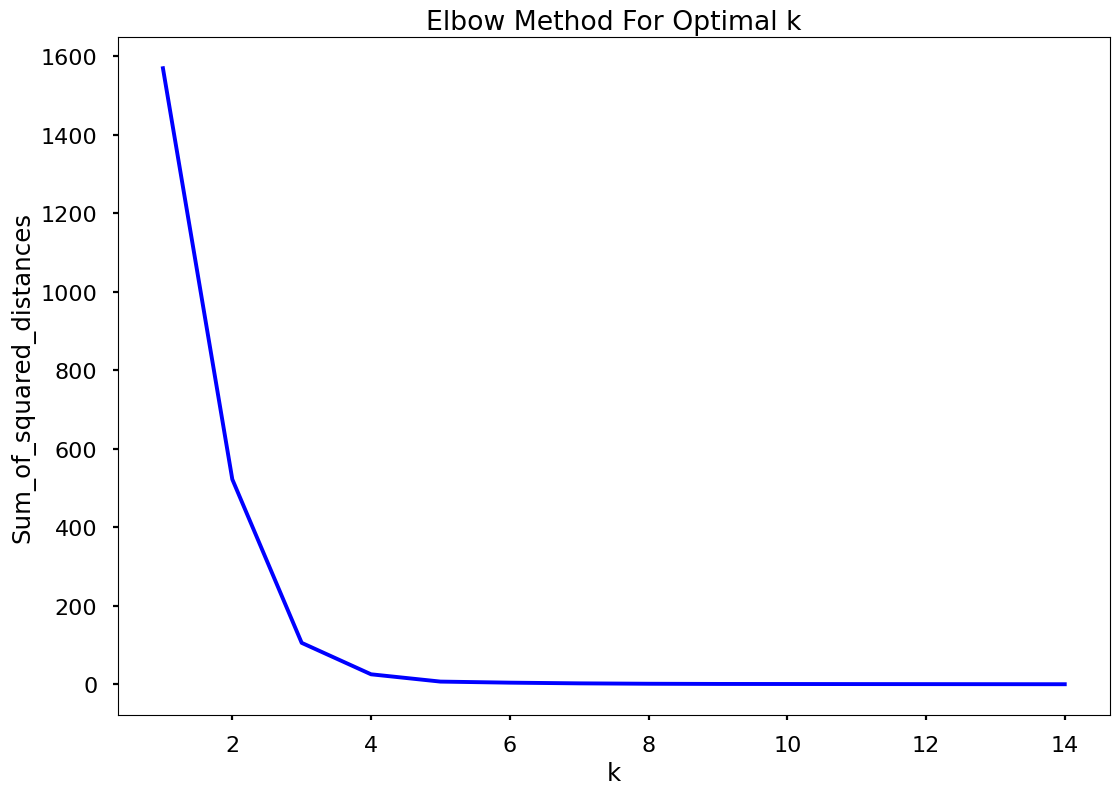

In [365]:
# Plotting the elbow curve to find the optimal number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [366]:
#Fitting and predicting the predicted labels using the optimal number of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(data_transformed).predict(data_transformed)
labels

array([1, 1, 1, ..., 0, 0, 0])

In [367]:
pd.DataFrame(labels).value_counts()

0    12140
2     6054
1     5426
dtype: int64

In [368]:
vcs_prj_data['labels'] = labels

In [369]:
vcs_prj_data[['duration', 'event_type', 'state', 'labels', 'project_id']].reset_index().drop(labels = ['index'], axis =1)

,duration,event_type,state,labels,project_id
0,31.0,1,1,1,58bfd5860da3ef7cef464c78
1,538.0,1,1,1,58bfd5860da3ef7cef464c78
2,28.0,1,1,1,58bfd5860da3ef7cef464c78
3,446.0,1,1,1,58bfd5860da3ef7cef464c78
4,31.0,1,1,1,58bfd5860da3ef7cef464c78
...,...,...,...,...,...
23615,746.0,1,1,1,615e90db3044794dcc96fe1e
23616,727.0,1,1,1,615e90db3044794dcc96fe1e
23617,823.0,1,2,0,615e90db3044794dcc96fe1e
23618,822.0,1,2,0,615e90db3044794dcc96fe1e


In [370]:
vcs_prj_data['project_success'] = 1

In [371]:
# Grouping project id with the labels and aggregating the project success counts
df_agg = vcs_prj_data.groupby(['project_id','labels']).agg({'project_success':sum})

<AxesSubplot: xlabel='project_id'>

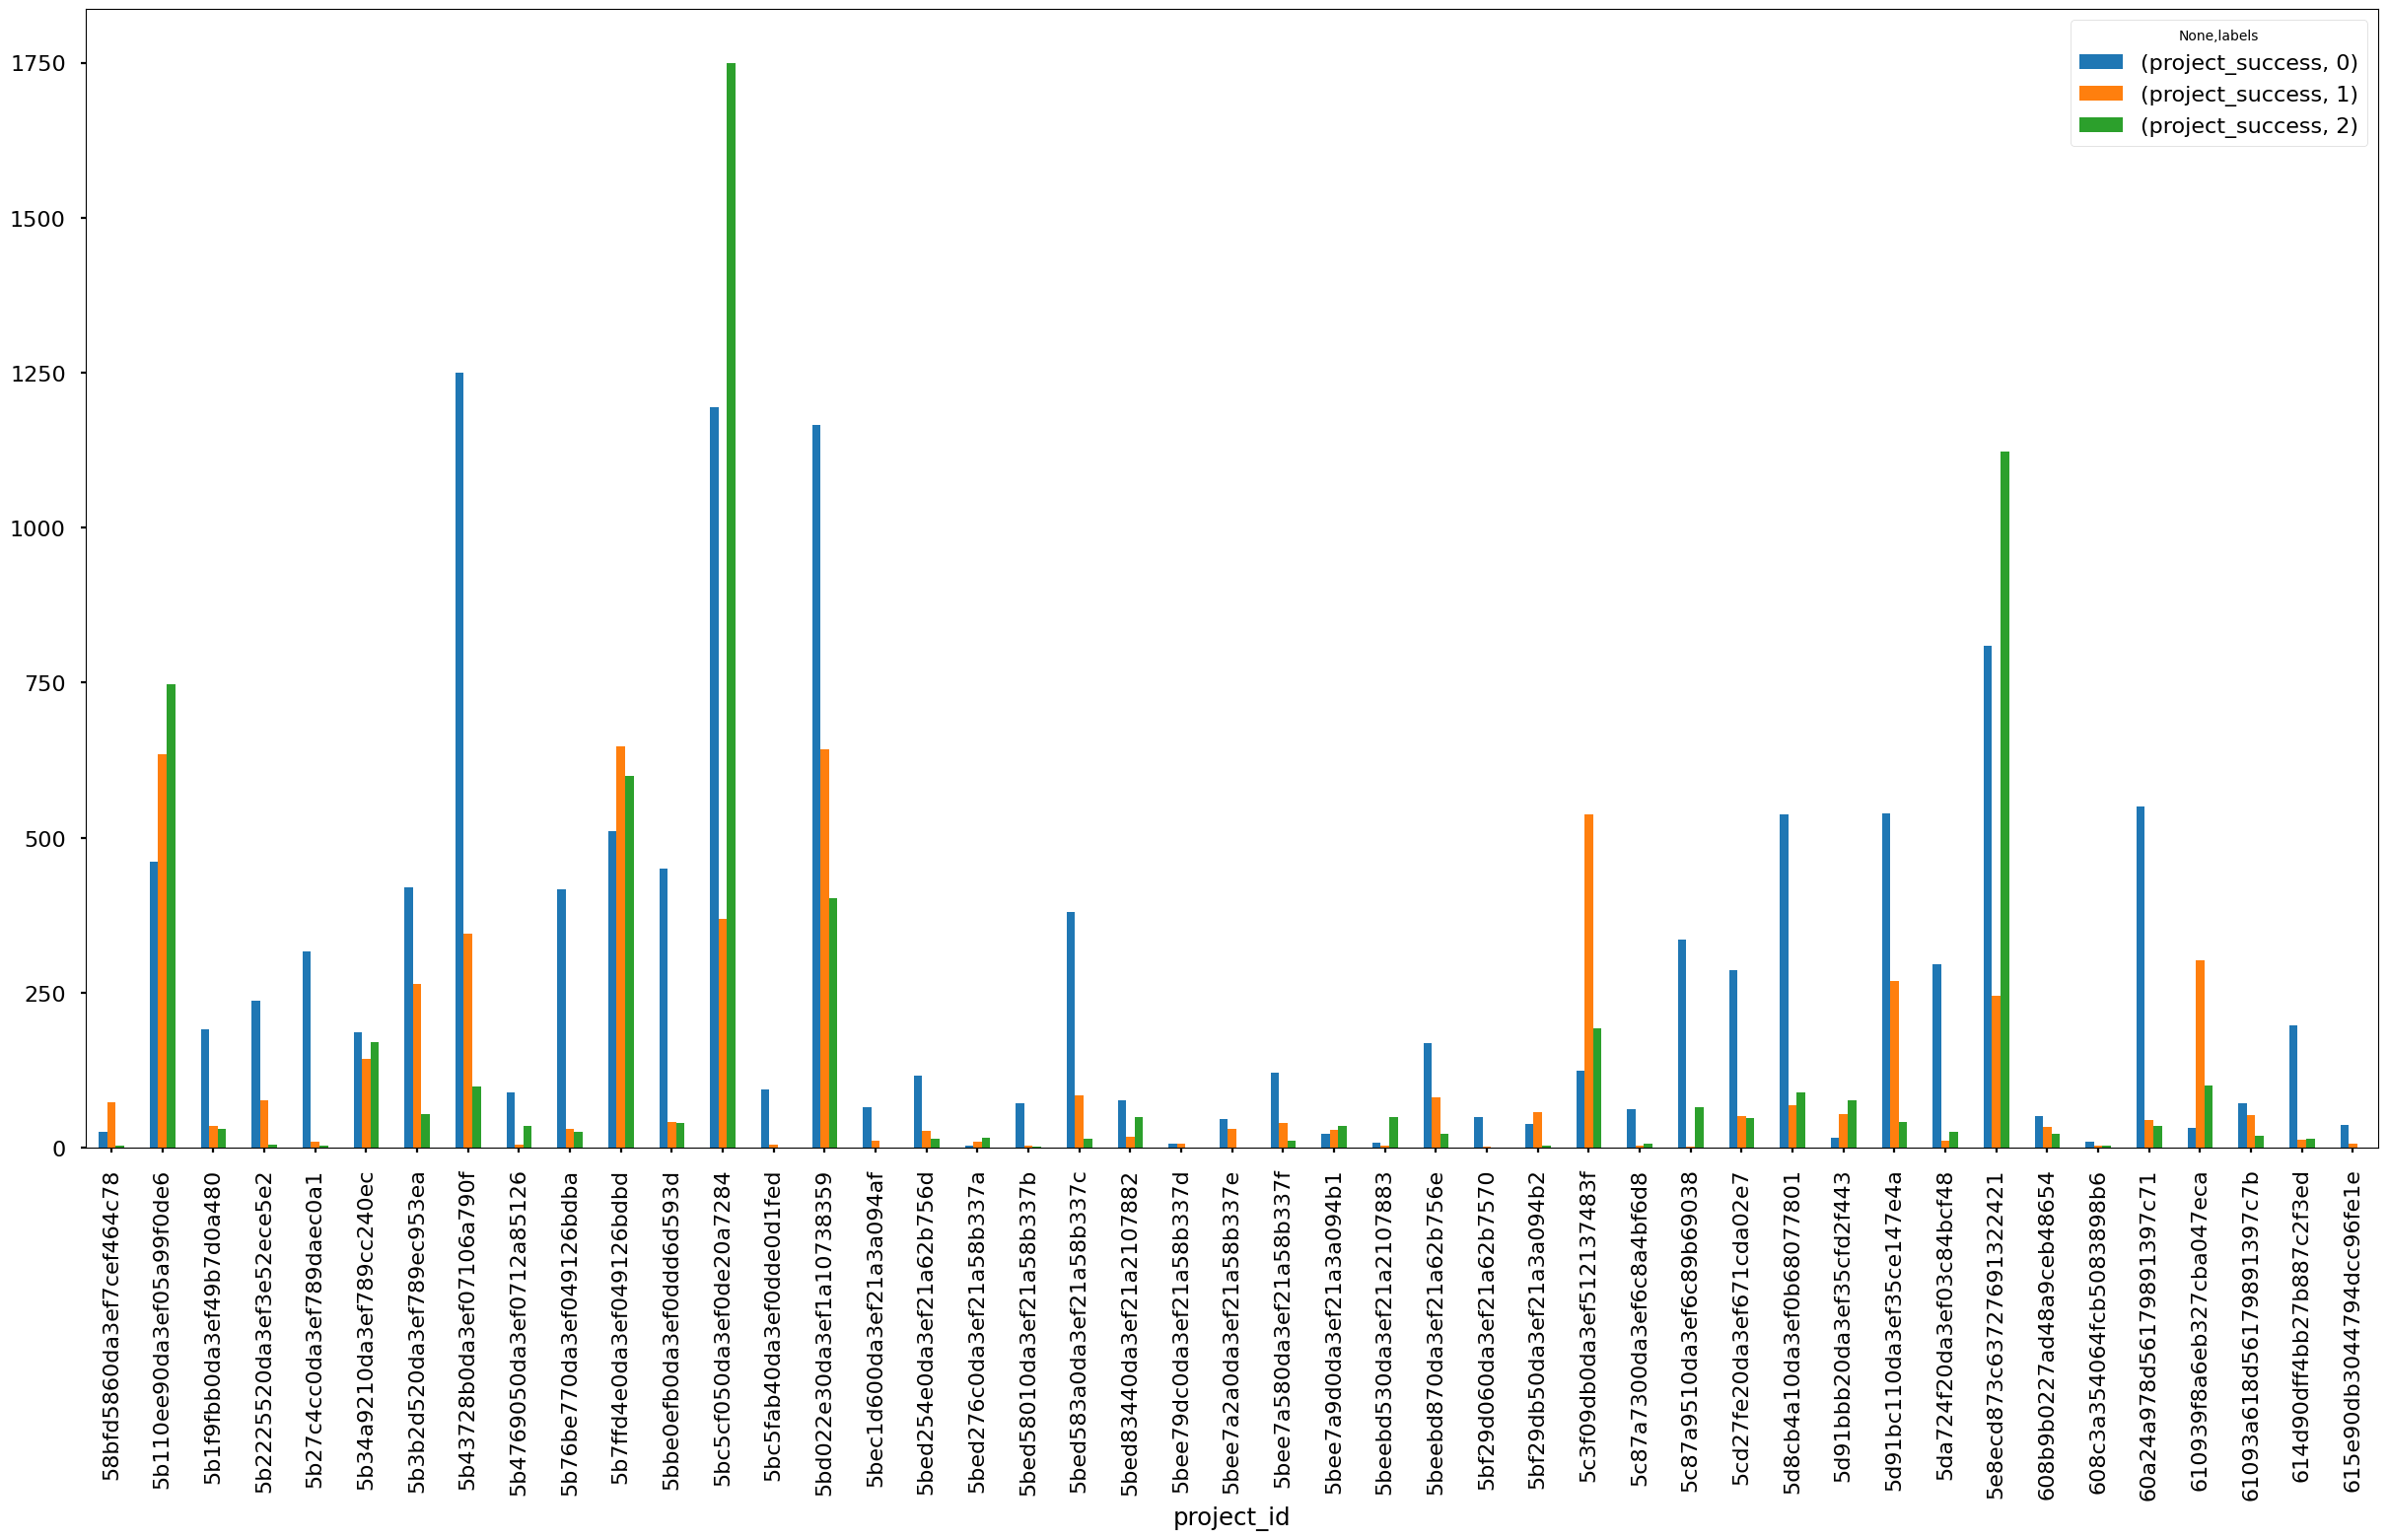

In [372]:
# Plotting the counts against each project for each of the labels
df_agg.unstack().fillna(0).plot(kind = 'bar', figsize=(30, 15))

In [373]:
# Validating against a project to check the project success ratio.
vcs_prj_data_temp = vcs_prj_data[vcs_prj_data['project_id'] == '5bc5cf050da3ef0de20a7284'][['event_type', 'duration', 'state', 'labels']].copy()
vcs_prj_data_temp['event_type'] = vcs_prj_data_temp['event_type'].map({1:'push',2:'cron',3:'api'})
vcs_prj_data_temp['state'] = vcs_prj_data_temp['state'].map({1:'failed',2:'passed',3:'errored', 4:'canceled'})
vcs_prj_data_temp[vcs_prj_data_temp['labels'] == 2][['state']].value_counts()

state   
errored     1575
canceled     174
dtype: int64